# Exploration

In this notebook, we aim to display some examples of the output of the kSVD and TWI-kSVD algorithms on two datasets, BME and DIGITS.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from source_code import utils
from source_code.models_ksvd import kSVD, kSVD_2D
from source_code.models_twi import TWI_kSVD, TWI_kSVD_2D

sparsity_levels = [2, 5, 10]

### Utils

In [2]:
def convert_to_list_dataset(matrix):
    return [matrix[:, i] for i in range(matrix.shape[1])]

def compare_example_1d(x, reconstructed_x_ksvd, reconstructed_x_twi,
                       true_label, pred_label_ksvd, my_pred_label_ksvd,
                       pred_label_twi, my_pred_label_twi,
                       err_ksvd, err_twi, sparsity
                       ):
    
    plt.plot(x, label=r'Original ($y_{true}$=' + f'{true_label})', c='green')
    plt.plot(reconstructed_x_ksvd, label=r'kSVD ($y_{SRC}$=' + f'{pred_label_ksvd}, ' + r'$y_{prop}=$' + f'{my_pred_label_ksvd}' + f', error={err_ksvd:.3f})', c='blue', alpha=0.5, linestyle='--')
    plt.plot(reconstructed_x_twi, label=r'TWI-kSVD ($y_{SRC}$=' + f'{pred_label_twi}, ' + r'$y_{prop}=$' + f'{my_pred_label_twi}' + f', error={err_twi:.3f})', c='red', alpha=0.5, linestyle='--')
    plt.ylim(-2, 3)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper left')
    plt.title(f'kSVD vs TWI-kSVD on BME, sparsity={sparsity}')
    plt.savefig(f'figures/1D_example_sparsity_{sparsity}.png')
    plt.show()

def compare_example_2d(x, y, reconstructed_x_ksvd, reconstructed_y_ksvd,
                       reconstructed_x_twi, reconstructed_y_twi,
                       true_label, pred_label_ksvd, my_pred_label_ksvd,
                       pred_label_twi, my_pred_label_twi,
                       err_ksvd, err_twi, sparsity
                       ):
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    axs[0].plot(x, y, label=r'Original ($y_{true}$=' + f'{true_label})', c='green')
    axs[0].set_xlim(-1.5, 1.5)
    axs[0].set_ylim(-1.5, 2)
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$y$')
    axs[0].set_title(f'Original')
    axs[0].legend(loc='upper left')

    axs[1].plot(reconstructed_x_ksvd, reconstructed_y_ksvd, label=r'kSVD ($y_{SRC}$=' + f'{pred_label_ksvd}, ' + r'$y_{prop}=$' + f'{my_pred_label_ksvd}' + f', error={err_ksvd:.3f})', c='blue', linestyle='--')
    axs[1].set_xlim(-1.5, 1.5)
    axs[1].set_ylim(-1.5, 2.5)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$y$')
    axs[1].set_title(f'kSVD')
    axs[1].legend(loc='upper left')

    axs[2].plot(reconstructed_x_twi, reconstructed_y_twi, label=r'TWI-kSVD ($y_{SRC}$=' + f'{pred_label_twi}, ' + r'$y_{prop}=$' + f'{my_pred_label_twi}' + f', error={err_twi:.3f})', c='red', linestyle='--')
    axs[2].set_xlim(-1.5, 1.5)
    axs[2].set_ylim(-1.5, 2.5)
    axs[2].set_xlabel(r'$x$')
    axs[2].set_ylabel(r'$y$')
    axs[2].set_title(f'TWI-kSVD')
    axs[2].legend(loc='upper left')

    plt.suptitle(f'kSVD vs TWI-kSVD on DIGITS, sparsity={sparsity}')
    plt.savefig(f'figures/2D_example_sparsity_{sparsity}.png')
    plt.show()

def plot_barplot(x_ksvd, x_twi, sparsity, dataset_name, n_classes):
    fig, ax = plt.subplots(figsize=(10, 5))
    index = np.arange(n_classes)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index - bar_width/2, x_ksvd, bar_width,
    alpha=opacity,
    color='blue',
    label='kSVD')

    rects2 = plt.bar(index + bar_width/2, x_twi, bar_width,
    alpha=opacity,
    color='red',
    label='TWI-kSVD')

    plt.xlabel('Class')
    plt.ylabel('L2 error')
    plt.title(f'Reconstruction errors (sparsity={sparsity}) grouped by classes ({dataset_name} dataset)')
    plt.xticks(index, range(n_classes))
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'figures/class_barplot_{dataset_name}_{sparsity}.png')
    plt.show()

## BME dataset

### Examples

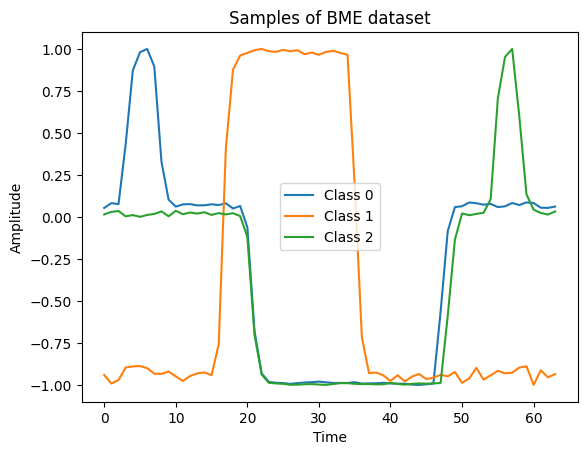

In [20]:
dataset_name = 'BME'
n_classes = 3

test_matrix, test_labels = utils.get_dataset(dataset_name, 'test')
test_list = convert_to_list_dataset(test_matrix)

for c in range(n_classes):
    sample = test_list[10*c]
    plt.plot(sample, label=f'Class {c}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title(f'Samples of {dataset_name} dataset')
plt.savefig(f'figures/{dataset_name}_samples.png')
plt.show()

Comparing models on BME dataset...


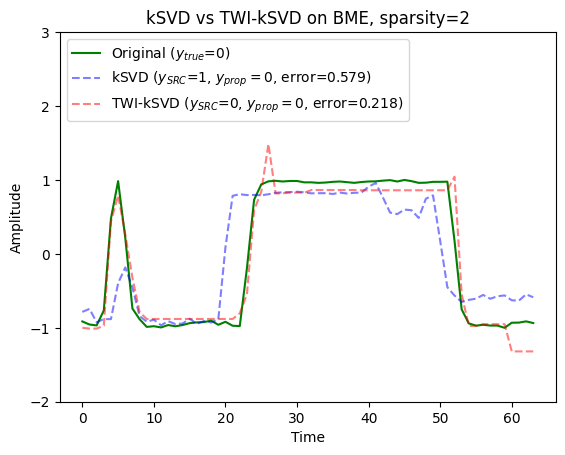

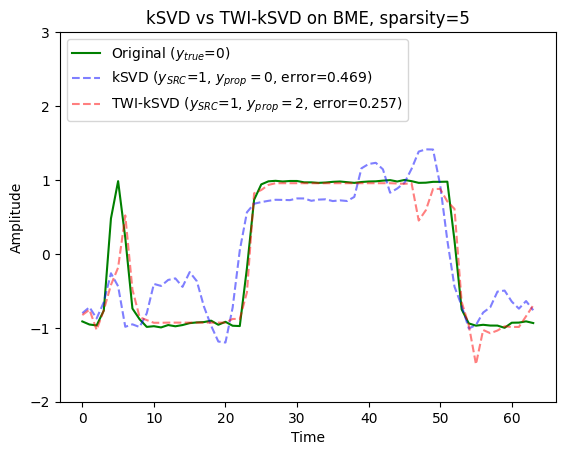

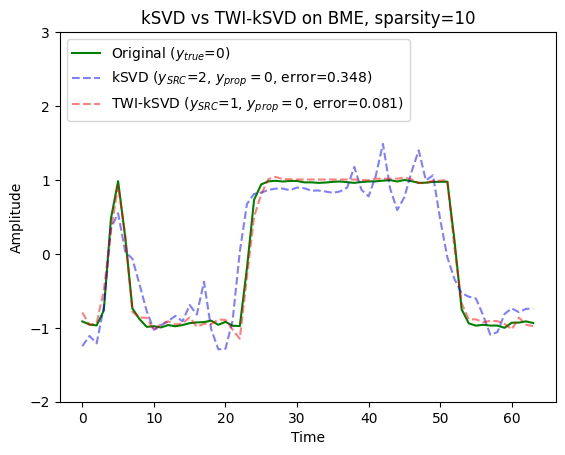

In [4]:
# i = np.random.randint(0, test_matrix.shape[1])
i = 3

x = test_list[i]
true_label = test_labels[i]

print(f'Comparing models on {dataset_name} dataset...')
for sparsity in sparsity_levels:
    model_ksvd_name = f'kSVD_{dataset_name}_sparsity_{sparsity}'
    model_ksvd = utils.load_model(model_ksvd_name)

    model_twi_name = f'TWI_kSVD_{dataset_name}_sparsity_{sparsity}'
    model_twi = utils.load_model(model_twi_name)

    reconstructed_x_ksvd, pred_label_ksvd, my_pred_label_ksvd = model_ksvd.reconstruct(x, sparsity)
    err_ksvd = np.linalg.norm(x - reconstructed_x_ksvd)/np.linalg.norm(x)

    reconstructed_x_twi, pred_label_twi, my_pred_label_twi = model_twi.reconstruct(x, sparsity)
    err_twi = np.linalg.norm(x - reconstructed_x_twi)/np.linalg.norm(x)

    compare_example_1d(x, reconstructed_x_ksvd, reconstructed_x_twi,
                       true_label, pred_label_ksvd, my_pred_label_ksvd,
                       pred_label_twi, my_pred_label_twi,
                       err_ksvd, err_twi, sparsity
                       )

### Performances per class - small sparsity

Comparing reconstruction errors on class 0...
  kSVD model:
    Test L2 error: 0.29016
  TWI-kSVD model:
    Test L2 error: 0.22957

Comparing reconstruction errors on class 1...
  kSVD model:
    Test L2 error: 0.19218
  TWI-kSVD model:
    Test L2 error: 0.08455

Comparing reconstruction errors on class 2...
  kSVD model:
    Test L2 error: 0.29432
  TWI-kSVD model:
    Test L2 error: 0.20526



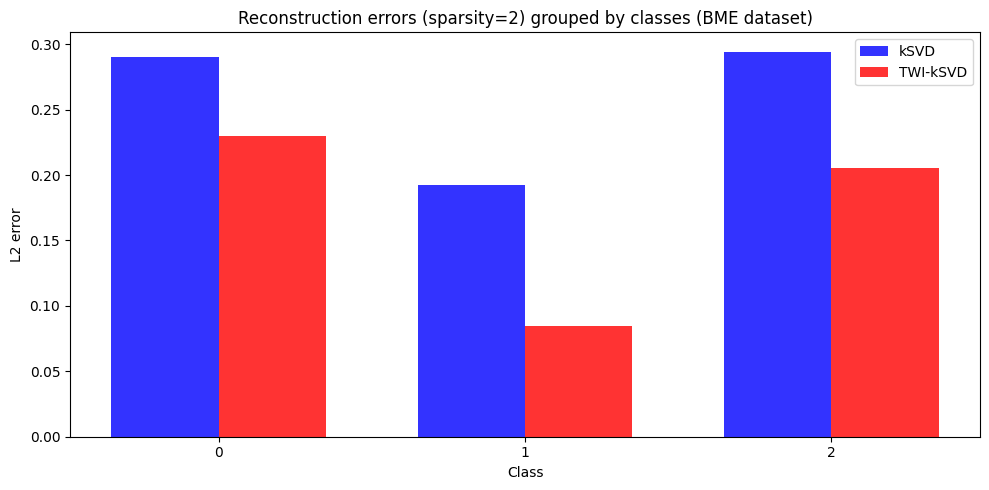

In [5]:
sparsity = 2
model_ksvd_name = f'kSVD_{dataset_name}_sparsity_{sparsity}'
model_ksvd = utils.load_model(model_ksvd_name)

model_twi_name = f'TWI_kSVD_{dataset_name}_sparsity_{sparsity}'
model_twi = utils.load_model(model_twi_name)

errors_ksvd, errors_twi = [], []
for c in range(n_classes):
    print(f'Comparing reconstruction errors on class {c}...')
    local_test_list = [x for x, y in zip(test_list, test_labels) if y == c]
    local_test_matrix = np.array(local_test_list).T
    local_test_labels = np.array([c]*local_test_matrix.shape[1])

    print(f'  kSVD model:')
    _, _, test_l2_error = utils.get_errors_1d_array(model_ksvd, local_test_matrix, local_test_labels, sparsity=sparsity, only_l2=True)
    errors_ksvd.append(test_l2_error)
    print(f'    Test L2 error: {test_l2_error:.5f}')

    print(f'  TWI-kSVD model:')
    _, _, test_l2_error = utils.get_errors_1d_list(model_twi, local_test_list, local_test_labels, sparsity=sparsity, only_l2=True)
    errors_twi.append(test_l2_error)
    print(f'    Test L2 error: {test_l2_error:.5f}\n')

plot_barplot(errors_ksvd, errors_twi, sparsity, dataset_name, n_classes)

## DIGITS dataset

### Examples

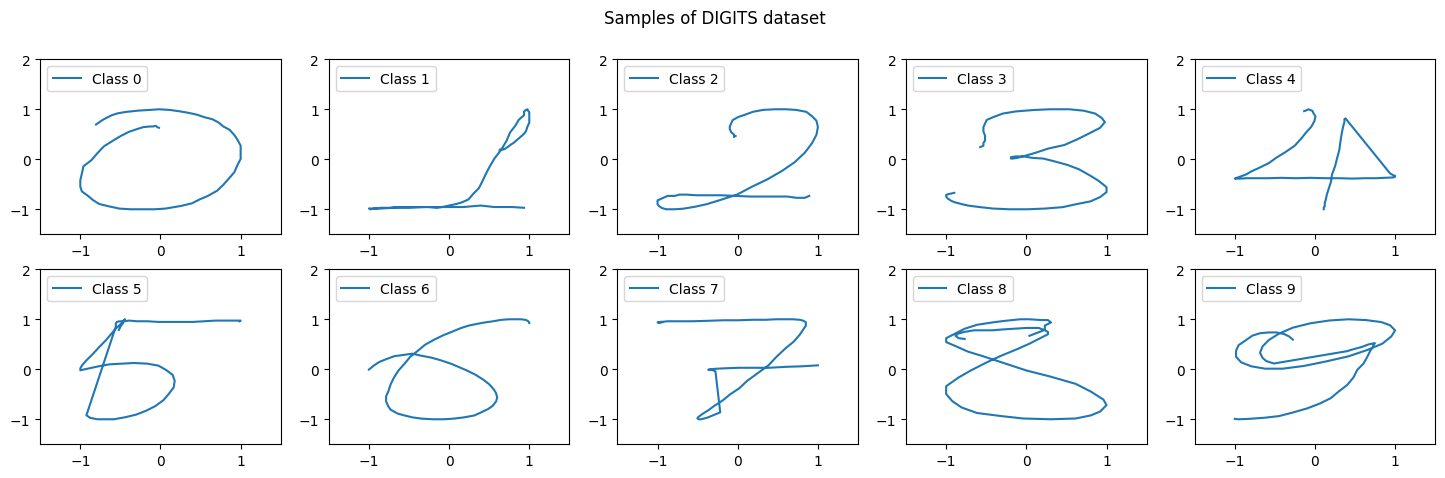

In [17]:
dataset_name = 'DIGITS'
n_classes = 10

X_test, Y_test, X_test_matrix, Y_test_matrix, test_labels = utils.get_dataset('DIGITS', 'test')

fig, axs = plt.subplots(2, 5, figsize=(18, 5))

for c in range(n_classes):
    sample_x = X_test[10*c]
    sample_y = Y_test[10*c]
    i, j = c//5, c%5
    axs[i, j].plot(sample_x, sample_y, label=f'Class {c}')
    axs[i, j].set_xlim(-1.5, 1.5)
    axs[i, j].set_ylim(-1.5, 2)
    axs[i, j].legend(loc='upper left')


fig.suptitle(f'Samples of {dataset_name} dataset')
plt.savefig(f'figures/{dataset_name}_samples.png')
plt.show()

Comparing models on DIGITS dataset...
Sample 83


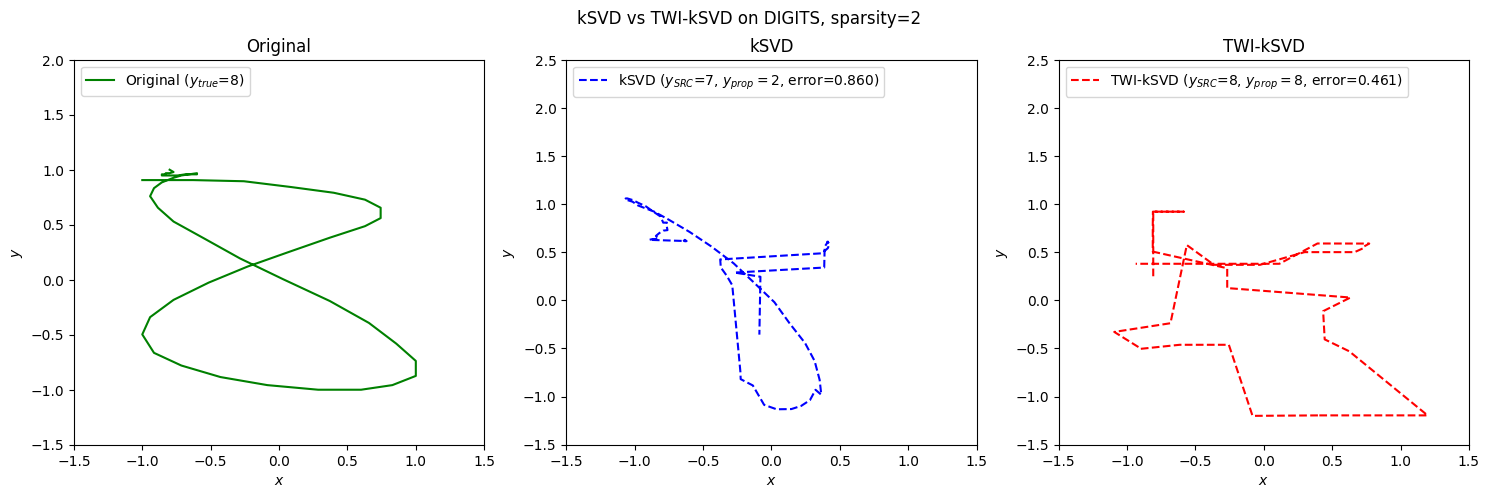

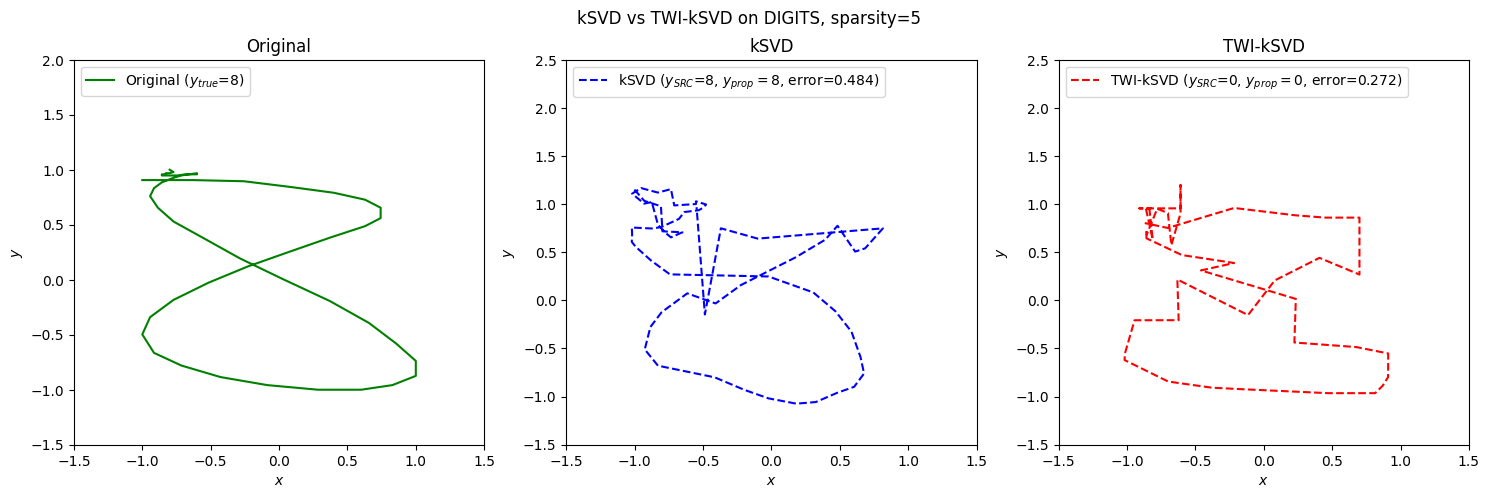

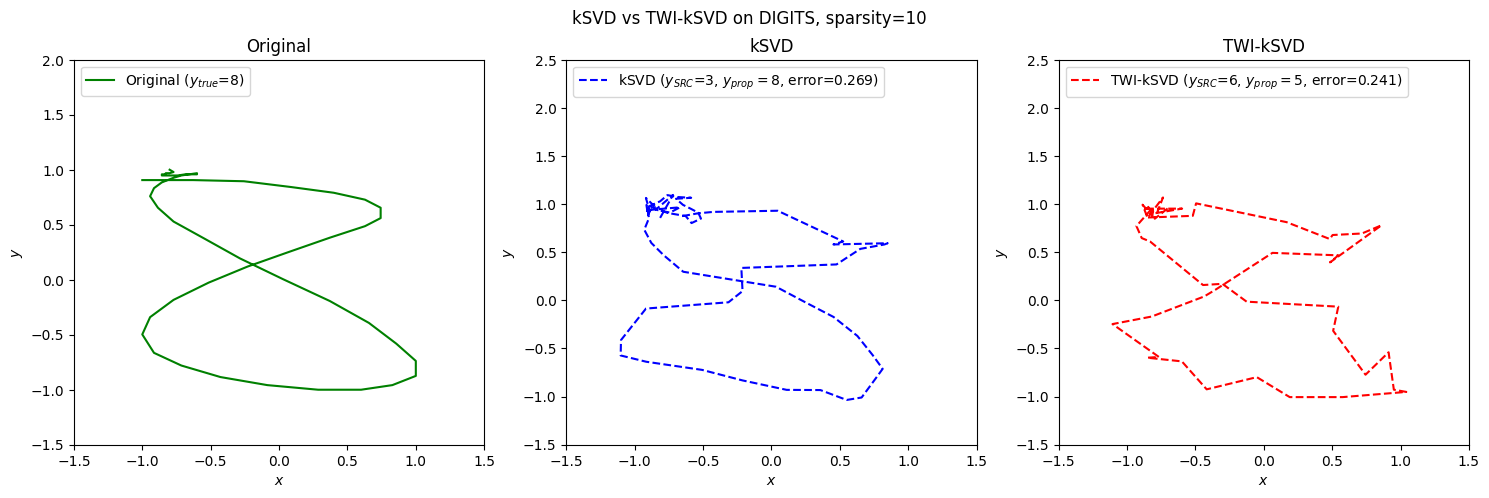

In [6]:
X_test, Y_test, X_test_matrix, Y_test_matrix, test_labels = utils.get_dataset('DIGITS', 'test')

# i = np.random.randint(0, X_test_matrix.shape[1])
i = 83

x = X_test[i]
y = Y_test[i]
true_len = len(x)
true_signal = np.array([x, y]).T
true_label = test_labels[i]

x_array = X_test_matrix[:, i]
y_array = Y_test_matrix[:, i]

print(f'Comparing models on {dataset_name} dataset...')
print(f'Sample {i}')

for sparsity in sparsity_levels:
    model_ksvd_name = f'kSVD_{dataset_name}_sparsity_{sparsity}'
    model_ksvd = utils.load_2d_model(model_ksvd_name)

    model_twi_name = f'TWI_kSVD_{dataset_name}_sparsity_{sparsity}'
    model_twi = utils.load_2d_model(model_twi_name)

    reconstructed_x_ksvd, reconstructed_y_ksvd, pred_label_ksvd, my_pred_label_ksvd = model_ksvd.reconstruct(x_array, y_array, sparsity)
    reconstructed_x_ksvd = reconstructed_x_ksvd[:true_len]
    reconstructed_y_ksvd = reconstructed_y_ksvd[:true_len]

    reconstructed_x_twi, reconstructed_y_twi, pred_label_twi, my_pred_label_twi = model_twi.reconstruct(x_array, y_array, sparsity)
    reconstructed_x_twi = reconstructed_x_twi[:true_len]
    reconstructed_y_twi = reconstructed_y_twi[:true_len]

    err_ksvd = np.linalg.norm(reconstructed_x_ksvd - x)/np.linalg.norm(x) + np.linalg.norm(reconstructed_y_ksvd - y)/np.linalg.norm(y)
    err_twi = np.linalg.norm(reconstructed_x_twi - x)/np.linalg.norm(x) + np.linalg.norm(reconstructed_y_twi - y)/np.linalg.norm(y)

    compare_example_2d(x, y, reconstructed_x_ksvd, reconstructed_y_ksvd,
                       reconstructed_x_twi, reconstructed_y_twi,
                       true_label, pred_label_ksvd, my_pred_label_ksvd,
                       pred_label_twi, my_pred_label_twi,
                       err_ksvd, err_twi, sparsity
                       )

### Performances per class - small sparsity

Comparing reconstruction errors on class 0...
  kSVD model:
    Test L2 error: 0.41620
  TWI-kSVD model:
    Test L2 error: 0.51783

Comparing reconstruction errors on class 1...
  kSVD model:
    Test L2 error: 0.46719
  TWI-kSVD model:
    Test L2 error: 0.42308

Comparing reconstruction errors on class 2...
  kSVD model:
    Test L2 error: 0.40846
  TWI-kSVD model:
    Test L2 error: 0.40598

Comparing reconstruction errors on class 3...
  kSVD model:
    Test L2 error: 0.42768
  TWI-kSVD model:
    Test L2 error: 0.53323

Comparing reconstruction errors on class 4...
  kSVD model:
    Test L2 error: 0.55929
  TWI-kSVD model:
    Test L2 error: 0.55874

Comparing reconstruction errors on class 5...
  kSVD model:
    Test L2 error: 0.59036
  TWI-kSVD model:
    Test L2 error: 0.61442

Comparing reconstruction errors on class 6...
  kSVD model:
    Test L2 error: 0.47746
  TWI-kSVD model:
    Test L2 error: 0.57770

Comparing reconstruction errors on class 7...
  kSVD model:
    Test 

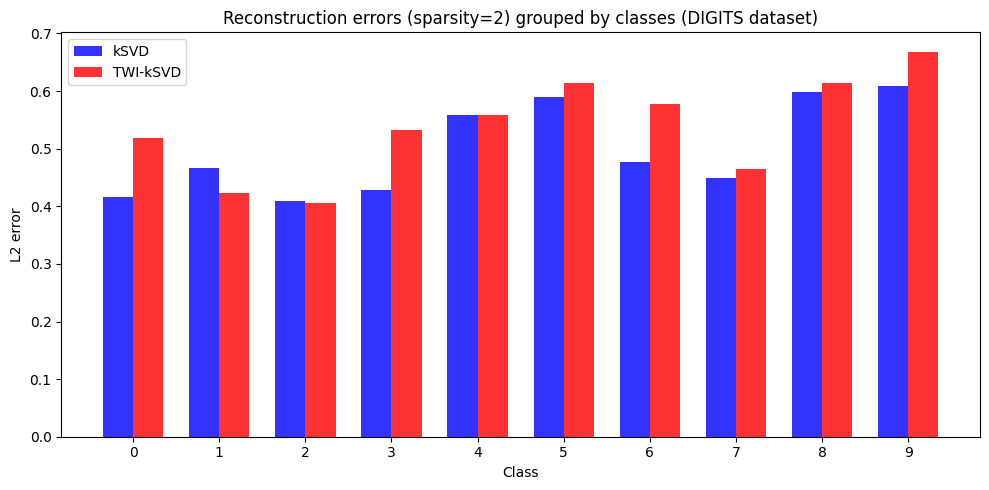

In [8]:
sparsity = 2
model_ksvd_name = f'kSVD_{dataset_name}_sparsity_{sparsity}'
model_ksvd = utils.load_2d_model(model_ksvd_name)

model_twi_name = f'TWI_kSVD_{dataset_name}_sparsity_{sparsity}'
model_twi = utils.load_2d_model(model_twi_name)

errors_ksvd, errors_twi = [], []
for c in range(n_classes):
    print(f'Comparing reconstruction errors on class {c}...')
    local_X_test = [x for x, label in zip(X_test, test_labels) if label == c]
    local_Y_test = [x for x, label in zip(Y_test, test_labels) if label == c]
    local_X_test_matrix = X_test_matrix[:, test_labels == c]
    local_Y_test_matrix = Y_test_matrix[:, test_labels == c]
    local_test_labels = np.array([c]*local_X_test_matrix.shape[1])

    print(f'  kSVD model:')
    _, _, test_l2_error = utils.get_errors_2d_array(model_ksvd, local_X_test_matrix, local_Y_test_matrix, local_X_test, local_Y_test, local_test_labels, sparsity=sparsity, only_l2=True)
    errors_ksvd.append(test_l2_error)
    print(f'    Test L2 error: {test_l2_error:.5f}')

    print(f'  TWI-kSVD model:')
    _, _, test_l2_error = utils.get_errors_2d_list(model_twi, local_X_test, local_Y_test, local_test_labels, sparsity=sparsity, only_l2=True)
    errors_twi.append(test_l2_error)
    print(f'    Test L2 error: {test_l2_error:.5f}\n')

plot_barplot(errors_ksvd, errors_twi, sparsity, dataset_name, n_classes)